In [62]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

%matplotlib inline 

In [63]:
batch_size=256
image_size=(116, 116)

In [64]:
train_dataset = image_dataset_from_directory('C:/Users/Vladislav/PycharmProjects/OpenGL/dataset',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 30973 files belonging to 2 classes.
Using 27876 files for training.


In [65]:
validation_dataset = image_dataset_from_directory('C:/Users/Vladislav/PycharmProjects/OpenGL/dataset',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 30973 files belonging to 2 classes.
Using 3097 files for validation.


In [68]:
test_dataset = image_dataset_from_directory('C:/Users/Vladislav/PycharmProjects/OpenGL/Testset',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4816 files belonging to 2 classes.


In [69]:
class_names =['working','notworking']

In [70]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(116, 116, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 2 нейрон по количеству классов
model.add(Dense(2, activation='softmax'))

In [71]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Epoch 1/3
109/109 - 316s - loss: 0.0577 - accuracy: 0.9931 - val_loss: 0.0969 - val_accuracy: 0.9974 - 316s/epoch - 3s/step
Epoch 2/3
109/109 - 323s - loss: 0.0144 - accuracy: 0.9987 - val_loss: 0.0063 - val_accuracy: 0.9987 - 323s/epoch - 3s/step
Epoch 3/3
109/109 - 323s - loss: 7.7217e-04 - accuracy: 0.9997 - val_loss: 0.0029 - val_accuracy: 0.9997 - 323s/epoch - 3s/step


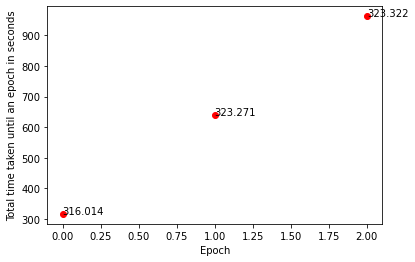

In [74]:
history = model.fit(train_dataset,
                validation_data=validation_dataset,
                    epochs=3,
                    verbose=2,
                    callbacks = [timecallback()])

In [75]:
scores = model.evaluate(test_dataset, verbose=1)

19/19 [==============================] - 14s 697ms/step - loss: 1.5654 - accuracy: 0.9371


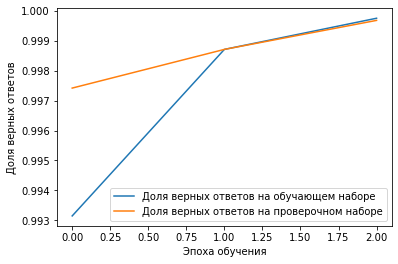

In [76]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

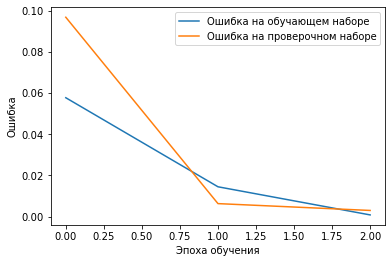

In [77]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [79]:
model.save('C:/Users/Vladislav/PycharmProjects/OpenGL/model')

INFO:tensorflow:Assets written to: C:/Users/Vladislav/PycharmProjects/OpenGL/model\assets


INFO:tensorflow:Assets written to: C:/Users/Vladislav/PycharmProjects/OpenGL/model\assets
